In [34]:
import csv
import time
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler,StandardScaler

In [35]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

# import io
# from google.colab import files
# uploaded = files.upload()
# data = pd.read_csv(io.BytesIO(uploaded['AAA.csv']))

Mounted at /content/drive


In [36]:
import os
stockNames=os.listdir("/content/drive/MyDrive/intro-ds/data/csv-10-30/")
print(stockNames)
stock_trace = stockNames[1:4]
print(stock_trace)

['CLM.csv', 'DFC.csv', 'BTP.csv', 'HII.csv', 'DTA.csv', 'FCN.csv', 'GSP.csv', 'DTC.csv', 'FUESSVFL.csv', 'GKM.csv', 'DTK.csv', 'HLC.csv', 'BPC.csv', 'AGP.csv', 'CSM.csv', 'DXS.csv', 'CEO.csv', 'DC2.csv', 'E1VFVN30.csv', 'DCM.csv', 'ACL.csv', 'DBT.csv', 'BSC.csv', 'DXP.csv', 'DXG.csv', 'DNW.csv', 'BSI.csv', 'CHP.csv', 'CKG.csv', 'ABT.csv', 'CLH.csv', 'HBD.csv', 'CRC.csv', 'BCE.csv', 'BCC.csv', 'AAM.csv', 'GHC.csv', 'ALT.csv', 'DID.csv', 'APG.csv', 'DAT.csv', 'CEE.csv', 'DTT.csv', 'EVF.csv', 'ASM.csv', 'CCL.csv', 'GEX.csv', 'FLC.csv', 'AGR.csv', 'FDC.csv', 'CTF.csv', 'FUEMAV30.csv', 'BIC.csv', 'BST.csv', 'ACC.csv', 'BHT.csv', 'AAA.csv', 'DHM.csv', 'GIC.csv', 'HDP.csv', 'BMF.csv', 'APC.csv', 'ELC.csv', 'BRC.csv', 'DNP.csv', 'DIH.csv', '1-log-crawl.txt', 'DSP.csv', 'HAT.csv', 'C21.csv', 'DTV.csv', 'BII.csv', 'CTI.csv', 'DC4.csv', 'HBC.csv', 'HEJ.csv', 'HAX.csv', 'APS.csv', 'BSR.csv', 'HCT.csv', 'CIA.csv', 'CDC.csv', 'HDB.csv', 'CTT.csv', 'CPC.csv', 'GTA.csv', 'FUEVFVND.csv', 'GTN.csv', 'BM

In [37]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [38]:
# def loss_func(y_true, y_pred):
#     squared_difference = tf.square(y_true - y_pred)
#     sign = tf.sign(y_true - y_pred)
#     mean = tf.reduce_mean(squared_difference, axis=-1)
#     if sign < 0:
#         return mean * 1.2

#Chỉ dùng thuộc tính close để train => input shape=30, 1
def training():
  for name in stock_trace: # chọn các mã để train
    data=pd.read_csv('/content/drive/MyDrive/intro-ds/data/csv-10-30/'+name,
                    names=[ 'date', 'adjust', 'close', 'change_perc', 'avg', 'volume_match', 'value_match', 
                              'volume_reconcile', 'value_reconcile', 'open', 'high', 'low', 'volume'])
    data.drop(["change_perc", "volume_match", "avg",
                            "value_match", "volume_reconcile", "value_reconcile"],  axis = 1, inplace = True)
    #chuẩn hóa
    scaler = StandardScaler()
    scaled = scaler.fit_transform(data.values[:, 2:3])#chỉ lấy thuộc tính close
    index=int(2*scaled.shape[0]/3)
    # print(index)
    X_train=scaled[0:index] #Train 2/3 data
    y_train=scaled[1:index+1]
    X_train=np.reshape(X_train, (index, 1 , 1))
    print(X_train.shape)
    print(type(y_train[0]))
    
    #Model
    regressor = Sequential()

    regressor.add(LSTM(units=1, activation= 'sigmoid', input_shape=(30, 1)))#cửa sổ 30, số chiều dữ liệu 1
    regressor.add(Dense(units=1))

    regressor.compile(optimizer='adam', loss='mean_squared_error')
    history=regressor.fit(X_train, y_train, batch_size=4, epochs=150)

    regressor.save('outputModels/'+name[:-4]+'.h5')
    print('Saved '+ name)



In [39]:
start = time.time()
training()
print('time:', time.time() - start)

(772, 1, 1)
<class 'numpy.ndarray'>
Epoch 1/150
193/193 [==============================] - 1s 1ms/step - loss: 1.2785
Epoch 2/150
193/193 [==============================] - 0s 1ms/step - loss: 1.1623
Epoch 3/150
193/193 [==============================] - 0s 2ms/step - loss: 1.0873
Epoch 4/150
193/193 [==============================] - 0s 1ms/step - loss: 1.0204
Epoch 5/150
193/193 [==============================] - 0s 1ms/step - loss: 0.9516
Epoch 6/150
193/193 [==============================] - 0s 1ms/step - loss: 0.8801
Epoch 7/150
193/193 [==============================] - 0s 1ms/step - loss: 0.8102
Epoch 8/150
193/193 [==============================] - 0s 1ms/step - loss: 0.7438
Epoch 9/150
193/193 [==============================] - 0s 1ms/step - loss: 0.6816
Epoch 10/150
193/193 [==============================] - 0s 1ms/step - loss: 0.6240
Epoch 11/150
193/193 [==============================] - 0s 1ms/step - loss: 0.5713
Epoch 12/150
193/193 [==============================] - 0s 1

In [40]:
from tensorflow import keras
def test(name):
  model = keras.models.load_model('outputModels/'+name+'.h5')
  data=pd.read_csv('/content/drive/MyDrive/intro-ds/data/csv-10-30/'+name+'.csv',
                    names=[ 'date', 'adjust', 'close', 'change_perc', 'avg', 'volume_match', 'value_match', 
                              'volume_reconcile', 'value_reconcile', 'open', 'high', 'low', 'volume'])
  data.drop(["change_perc", "volume_match", "avg",
                          "value_match", "volume_reconcile", "value_reconcile"],  axis = 1, inplace = True)
  scaler = StandardScaler()
  scaled = scaler.fit_transform(data.values[:, 2:3])#chỉ lấy thuộc tính close

  index=int(2*scaled.shape[0]/3)
  inputs = scaled[index:]
  inputs = np.reshape(inputs, (inputs.shape[0], 1, 1))
  predicted_stock_price = model.predict(inputs)#predict
  predicted_stock_price = scaler.inverse_transform(predicted_stock_price)
  predicted_stock_price=predicted_stock_price.reshape(inputs.shape[0])

  real_stock_price=data.values[index:, 2:3].reshape(inputs.shape[0])#real from data
  past_stock_price=data.values[index-1:-1, 2:3].reshape(inputs.shape[0])#real from data
  print(predicted_stock_price[200:220])
  print(real_stock_price[200:220])
#   print(past_stock_price[200:220])


  loss=0  # loss
  accumulation = 0  # true rate
  total = 0   # real play
  for i in range(len(real_stock_price)):
    loss+=predicted_stock_price[i]-real_stock_price[i]
    accumulation += np.sign((predicted_stock_price[i]-past_stock_price[i]) * (real_stock_price[i]-past_stock_price[i]))
  print('Sum loss: '+str(loss))
  print('True rate:', accumulation/len(real_stock_price)) # tỉ lệ dự báo đúng hướng (lên, xuống)

  n_day = 3
  profit_rate = np.zeros(len(real_stock_price)-n_day)
  for i in range(len(real_stock_price)-n_day):
    future = i + n_day
    predict_true = np.sign((predicted_stock_price[future]-past_stock_price[i]) * (real_stock_price[future]-past_stock_price[i])) # 1 if true else -1
    profit = np.abs(real_stock_price[future]-past_stock_price[i])
    if predicted_stock_price[future] - past_stock_price[i] > 0:
        total += predict_true * profit
    profit_rate[i] = profit / past_stock_price[i]
  print('Total earned money:', total) # tổng tiền kiếm được nếu chơi theo dự đoán của model (tăng thì mua) và bán sau n ngày
  print('Profit rate:', np.mean(profit_rate)) # tỉ lệ lãi/ vốn

  plt.plot( real_stock_price[:] , color = 'red' , label = 'Real Stock Price')
  plt.plot( predicted_stock_price[:], color = 'green' , label = 'Predicted Stock Price')
  plt.title('Stock Price Prediction '+name)
  plt.xlabel('time' )
  plt.ylabel('Stock Price')
  plt.legend()
  plt.show()


[18.568764 18.568764 18.568764 18.568764 18.568764 18.568764 18.568764
 18.568764 18.568764 18.568764 18.568764 18.568764 18.568764 18.568764
 18.568764 18.568764 18.568764 18.568764 20.683672 20.683672]
[18.4 18.4 18.4 18.4 18.4 18.4 18.4 18.4 18.4 18.4 18.4 18.4 18.4 18.4
 18.4 18.4 18.4 18.4 21.1 21.1]
Sum loss: -222.79632949829082
True rate: 0.22020725388601037
Total earned money: 432.29999999999995
Profit rate: 0.08468481707143899


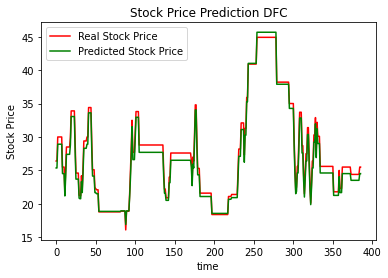

[11.587227 11.488752 11.685248 11.587227 11.439344 11.587227 11.538046
 11.38982  11.439344 11.38982  11.38982  11.290434 11.340184 11.439344
 11.488752 11.439344 11.340184 11.488752 11.38982  11.488752]
[11.5 11.4 11.6 11.5 11.35 11.5 11.45 11.3 11.35 11.3 11.3 11.2 11.25
 11.35 11.4 11.35 11.25 11.4 11.3 11.4]
Sum loss: 3.25068473815924
True rate: 0.6595310907237513
Total earned money: 158.25000000000009
Profit rate: 0.02337250749750362


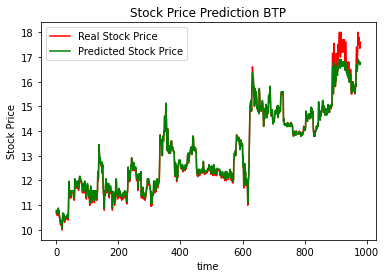

[19.353146 20.524027 20.076982 21.307407 22.923967 23.25582  23.641298
 23.696205 24.133827 23.805883 23.200598 22.535383 22.424118 21.475233
 20.300402 21.08357  21.698881 22.033981 21.698881 21.922342]
[19.45 20.5 20.1 21.2 22.65 22.95 23.3 23.35 23.75 23.45 22.9 22.3 22.2
 21.35 20.3 21.0 21.55 21.85 21.55 21.75]
Sum loss: -36.90626296997071
True rate: 0.5738636363636364
Total earned money: 132.95000000000002
Profit rate: 0.043219282199154316


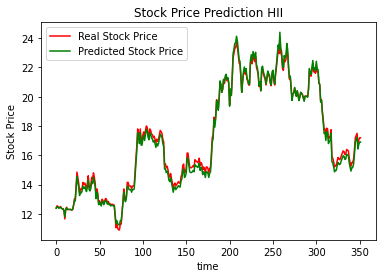

In [41]:
for name in stock_trace:
    test(name[:-4])

In [42]:
import math